In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical




In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
from keras.layers import MaxPooling2D
#from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout






In [ ]:
train=pd.read_csv('/content/sign_mnist_train.csv')
test=pd.read_csv('/content/sign_mnist_test.csv')
train.head()
test.head()
labels=train['label'].values
print(labels)

[ 3  6  2 ... 20  7 22]


In [ ]:
train.drop('label',axis=1,inplace=True)
train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,173,176,179,182,182,183,184,185,185,185,...,255.0,245.0,248.0,247.0,247.0,247.0,246.0,245.0,245.0,245.0
1376,160,163,167,171,175,179,182,184,187,189,...,107.0,80.0,189.0,255.0,247.0,249.0,250.0,247.0,211.0,237.0
1377,45,49,66,84,94,98,106,115,119,124,...,45.0,0.0,0.0,15.0,6.0,0.0,0.0,2.0,0.0,0.0
1378,189,190,194,196,197,199,200,201,202,202,...,227.0,226.0,225.0,225.0,224.0,223.0,222.0,220.0,220.0,218.0


In [ ]:
images=train.values
#images=np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten() for i in images])

In [ ]:
# one hot encoding technique
from sklearn.preprocessing import LabelBinarizer
label=LabelBinarizer()
labels.size
labels=label.fit_transform(labels)


In [ ]:
#view the lables
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


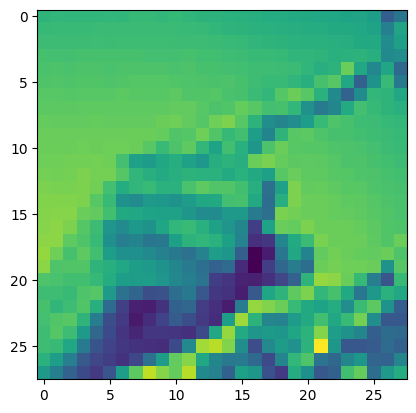

In [ ]:
#view on the image
index=1
print(labels[index])
plt.imshow(images[index].reshape(28,28,1))

In [ ]:
train_data=np.array(train,dtype='float32')
test_data=np.array(test,dtype='float32')


In [ ]:
class_name=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','p','Q','R','S','T','U','V','W','X','Y']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=42)
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (966, 784)
Training labels shape: (966, 24)
Testing data shape: (414, 784)
Testing labels shape: (414, 24)


In [ ]:
batch_size=113
num_classes=10
epochs=10


In [ ]:
x_train=x_train/255
x_test=x_test/255





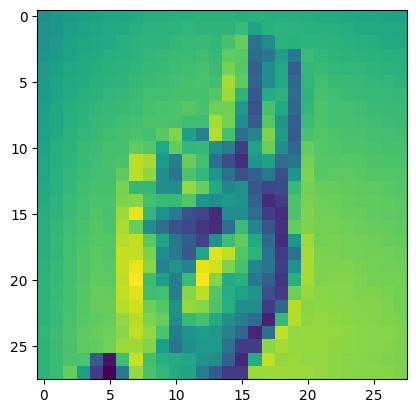

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))





In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Dense, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import backend as k
from keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32,3, activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),


     Conv2D(32,3, activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

     Conv2D(32,3, activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),
    Dense(128, activation='relu'),
    Dense(24,activation='softmax')  # activation change
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Loss
              metrics=['accuracy'])

In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 32)        128       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test),batch_size=18)

Epoch 1/100
54/54 [==============================] - 12s 17ms/step - loss: 2.8019 - accuracy: 0.1749 - val_loss: nan - val_accuracy: 0.0725
Epoch 2/100
54/54 [==============================] - 0s 7ms/step - loss: 1.8418 - accuracy: 0.5207 - val_loss: nan - val_accuracy: 0.0314
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 1.1433 - accuracy: 0.7019 - val_loss: nan - val_accuracy: 0.0314
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.7248 - accuracy: 0.8126 - val_loss: nan - val_accuracy: 0.0507
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4476 - accuracy: 0.8944 - val_loss: nan - val_accuracy: 0.1473
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.9431 - val_loss: nan - val_accuracy: 0.1787
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1682 - accuracy: 0.9700 - val_loss: nan - val_accuracy: 0.3092
Epoch 8/100
54/54 [=============

In [ ]:
#save the model
model.save("sign_mnist_cnn_100_Epochs.hs")
print("model saved")

model saved


In [ ]:
#plotting the label of the model
test_label=test['label']
test.drop('label',axis=1,inplace=True)


test_image=test.values
test_image=np.array([np.reshape(i,(28,28)) for i in test_image])
test_image=np.array([i.flatten() for i in test_image])

#test_label=label_binrizer.fit_transform
test_image=test_image.reshape(test_image.shape[0],28,28,1)
test_image.shape
y_pred=model.predict(test_image)


44/44 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score
test_image.size
y_pred.size


33096